In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df_supermarket = pd.read_json('supermarket.json')

print(df_supermarket.head)

<bound method NDFrame.head of                                                lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...>


In [92]:
def extrair_dados_loja_mes(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
            return None  # Adicione este retorno para o caso de nenhum mês corresponder
    return None  # Adicione este retorno para o caso de nenhuma loja corresponder ao ID fornecido

extrair_dados_loja_mes(1, 5)


{'mes': 5,
 'faturamento': {'higiene_e_saude': 15000,
  'limpeza': 19900,
  'bebidas': 8600,
  'carne_e_laticinios': 4900,
  'alimentacao': 5400},
 'gastos_funcionarios': 24000,
 'despesas_fornecedores': 19000,
 'gastos_diversos': 5400}

In [93]:
def extrair_faturamento_loja_mes(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    faturamento = sum(dados_mensais['faturamento'].values())
                    return faturamento
            return None  # Mova este retorno para fora do loop interno
    return None  # Adicione este retorno para o caso de nenhuma loja corresponder ao ID fornecido

extrair_faturamento_loja_mes(1, 2)


53300

In [77]:
def extrair_faturamento_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            faturamento_anual=0
            for dados_mensais in loja['dados_mensais']:
                faturamento_anual += sum(dados_mensais['faturamento'].values())
    return faturamento_anual
            
extrair_faturamento_loja_ano(4)

633600

In [78]:
def extrair_gasto_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            gasto_anual=0
            for dados_mensais in loja['dados_mensais']:
                gasto_anual = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais[ 'gastos_diversos']
    return gasto_anual
            
extrair_gasto_loja_ano(1)

63100

In [79]:
def extrair_lucro_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            lucro_anual=0
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes = sum(dados_mensais['faturamento'].values())
                gastos_mes = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores']
                lucro_anual += (faturamento_mes - gastos_mes)
    return lucro_anual
            
extrair_lucro_loja_ano(5)

38500

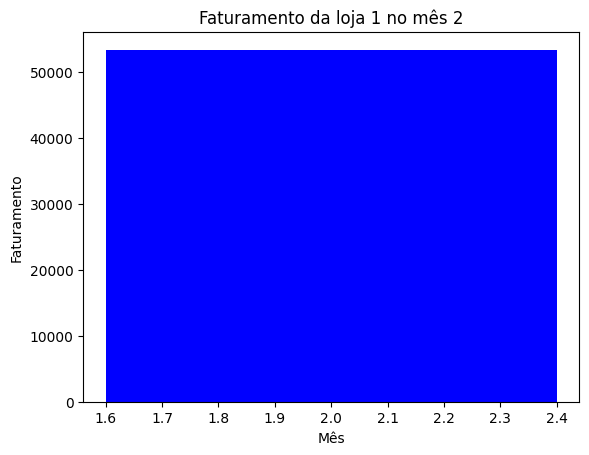

In [95]:
loja_id = 1
mes = 2
faturamento = extrair_faturamento_loja_mes(loja_id, mes)

if faturamento is not None:
    plt.bar([mes], [faturamento], color='blue')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.title(f'Faturamento da loja {loja_id} no mês {mes}')
    plt.show()
else:
    print(f"Não foi possível encontrar o faturamento da loja {loja_id} no mês {mes}.")

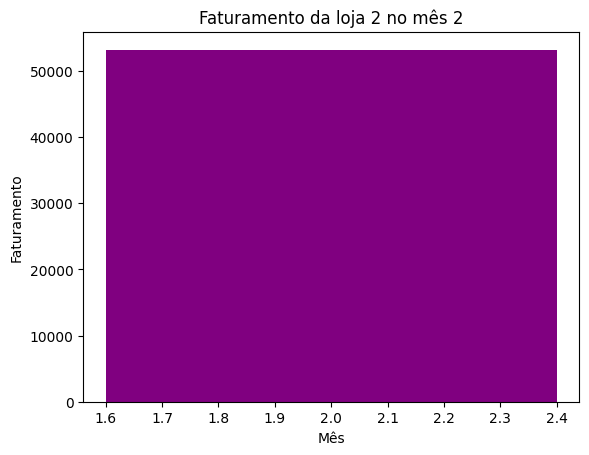

In [103]:
loja_id = 2
mes = 2
faturamento = extrair_faturamento_loja_mes(loja_id, mes)

if faturamento is not None:
    plt.bar([mes], [faturamento], color='purple')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.title(f'Faturamento da loja {loja_id} no mês {mes}')
    plt.show()
else:
    print(f"Não foi possível encontrar o faturamento da loja {loja_id} no mês {mes}.")

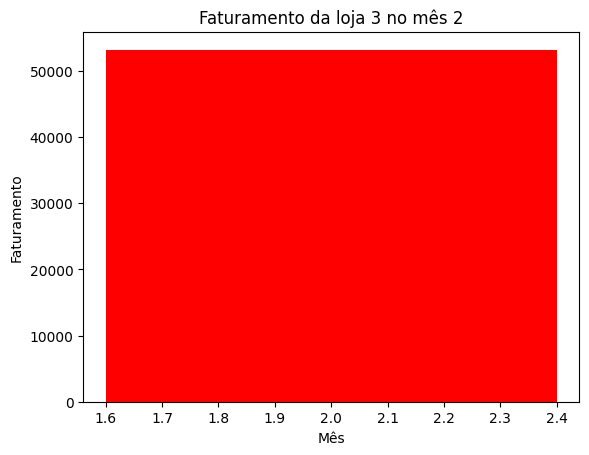

In [100]:
loja_id = 3
mes = 2
faturamento = extrair_faturamento_loja_mes(loja_id, mes)

if faturamento is not None:
    plt.bar([mes], [faturamento], color='red')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.title(f'Faturamento da loja {loja_id} no mês {mes}')
    plt.show()
else:
    print(f"Não foi possível encontrar o faturamento da loja {loja_id} no mês {mes}.")

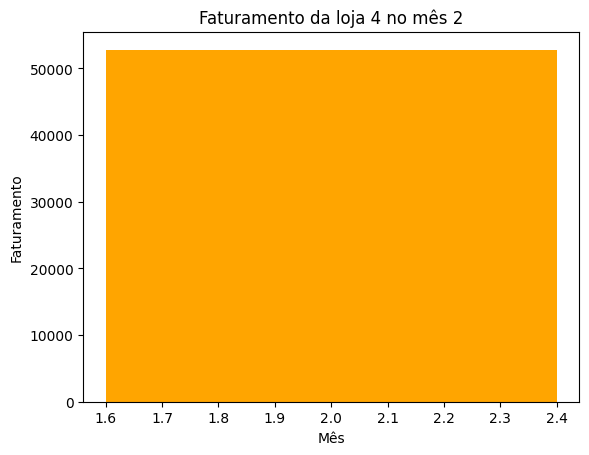

In [101]:
loja_id = 4
mes = 2
faturamento = extrair_faturamento_loja_mes(loja_id, mes)

if faturamento is not None:
    plt.bar([mes], [faturamento], color='orange')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.title(f'Faturamento da loja {loja_id} no mês {mes}')
    plt.show()
else:
    print(f"Não foi possível encontrar o faturamento da loja {loja_id} no mês {mes}.")

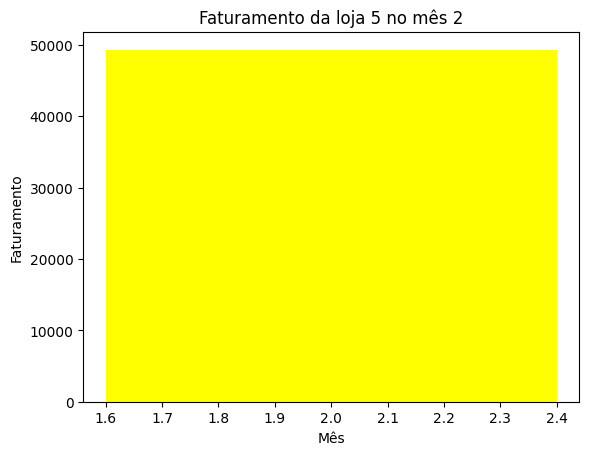

In [104]:
loja_id = 5
mes = 2
faturamento = extrair_faturamento_loja_mes(loja_id, mes)

if faturamento is not None:
    plt.bar([mes], [faturamento], color='yellow')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.title(f'Faturamento da loja {loja_id} no mês {mes}')
    plt.show()
else:
    print(f"Não foi possível encontrar o faturamento da loja {loja_id} no mês {mes}.")

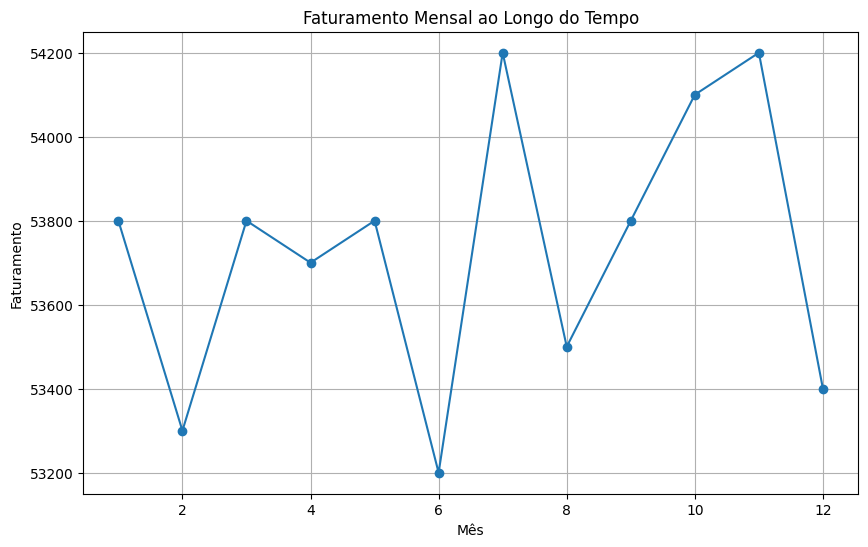

In [96]:
def plot_faturamento_tempo(loja_id):
    meses = range(1, 13)  # Supondo que tenhamos dados para os 12 meses
    faturamento_mensal = [extrair_faturamento_loja_mes(loja_id, mes) for mes in meses]
    
    plt.figure(figsize=(10, 6))
    plt.plot(meses, faturamento_mensal, marker='o', linestyle='-')
    plt.title('Faturamento Mensal ao Longo do Tempo')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.grid(True)
    plt.show()

plot_faturamento_tempo(1)  # Substitua o ID da loja conforme necessário

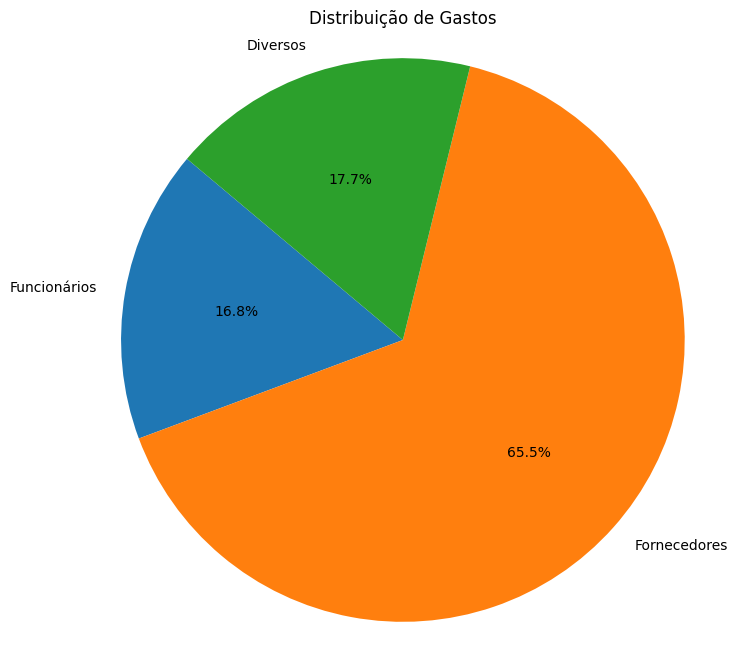

In [107]:
def plot_distribuicao_gastos(loja_id):
    gastos_labels = ['Funcionários', 'Fornecedores', 'Diversos']
    gastos_valores = [
        extrair_gasto_loja_ano(loja_id),
        sum([dados_mensais['despesas_fornecedores'] for dados_mensais in loja['dados_mensais']]),
        sum([dados_mensais['gastos_diversos'] for dados_mensais in loja['dados_mensais']])
    ]
    
    plt.figure(figsize=(8, 8))
    plt.pie(gastos_valores, labels=gastos_labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de Gastos')
    plt.axis('equal')
    plt.show()

plot_distribuicao_gastos(1)  # Substitua o ID da loja conforme necessário


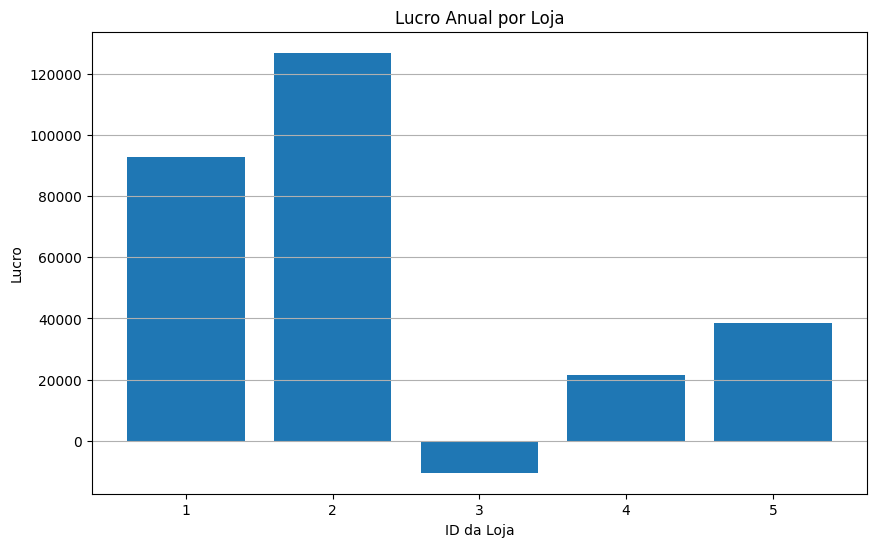

In [98]:
def plot_lucro_anual_por_loja():
    lojas_ids = [loja['id'] for loja in df_supermarket['lojas']]
    lucros_anuais = [extrair_lucro_loja_ano(loja_id) for loja_id in lojas_ids]
    
    plt.figure(figsize=(10, 6))
    plt.bar(lojas_ids, lucros_anuais)
    plt.title('Lucro Anual por Loja')
    plt.xlabel('ID da Loja')
    plt.ylabel('Lucro')
    plt.xticks(lojas_ids)
    plt.grid(axis='y')
    plt.show()

plot_lucro_anual_por_loja()


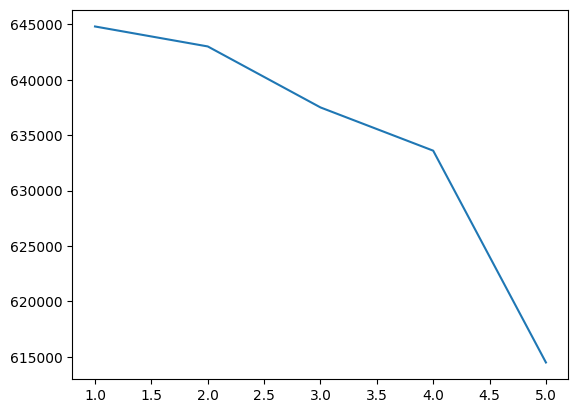

In [106]:
lojas = range(1, 6)
faturamento = []
for i in lojas:
    faturamento.append(extrair_faturamento_loja_ano(i))

plt.plot(lojas, faturamento)

In [111]:
from urllib import request, response

import requests

apikey = 'b9ebe666087f299f5e2aad3a03d093b6'
baseUrl = 'https://api.openweathermap.org/data/2.5/weather'
city = input('Informe a cidade: ')

url = f'{baseUrl}?q={city}&appid={apikey}'


print(url)

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)

else:
    print('Falha na requisição', response.status_code)

https://api.openweathermap.org/data/2.5/weather?q=Limeira&appid=b9ebe666087f299f5e2aad3a03d093b6
{'coord': {'lon': -47.4017, 'lat': -22.5647}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.9, 'feels_like': 301.59, 'temp_min': 301.9, 'temp_max': 301.9, 'pressure': 1016, 'humidity': 41, 'sea_level': 1016, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 355, 'gust': 1.24}, 'clouds': {'all': 0}, 'dt': 1716406394, 'sys': {'type': 2, 'id': 2090366, 'country': 'BR', 'sunrise': 1716370700, 'sunset': 1716410076}, 'timezone': -10800, 'id': 3458575, 'name': 'Limeira', 'cod': 200}
